In [1]:
import os
import glob
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import load_model  
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Softmax,Activation,Dense,Dropout
from sklearn.model_selection import train_test_split
from keras import optimizers

In [12]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten ,Input, Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization ,GlobalMaxPool2D, concatenate
from tensorflow.keras.models import Sequential , Model , load_model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint
from skimage.feature import greycomatrix, greycoprops
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
import matplotlib.image as mpimg
import pickle
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow import keras 
from tensorflow.keras import layers
from keras.models import Model
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
#BASIC HYPERPARAMETERS
num_epochs = 40
batch_size = 32
num_classes = 2
img_dim = 128
n_channel = 3
input_shape = (img_dim,img_dim,n_channel)
data_dir = '/content/drive/MyDrive/pdataset1/'

In [4]:
#Creating dataframe of (Image,Label) from the images
def createFrame(path,IMG_DIM):
    train_imgs = []
    labels = []
    #getting all folder name
    directories = os.listdir(path)
    for i in range(len(directories)):
        ls = []
        temp = []
        curPath = path +'/' +directories[i] + '/*'
        #getting all files name
        ls = glob.glob(curPath)
        for img in ls:
            x = img_to_array(load_img(img,target_size = IMG_DIM))
            temp.append(x)

        #print(len(ls))
        train_imgs  = train_imgs + temp
        label = []
        label = [i]*len(ls)
        labels += label

    df = pd.DataFrame(list(zip(train_imgs,labels)))
    df = df.sample(frac = 1) 
    return df

In [5]:
def data_split(df):
    df_imgs = df[0]
    df_imgs = list(df[0])
    df_imgs = np.array(df_imgs)
    df_imgs = df_imgs/255
    
    df_labels = df[1]
    df_labels = np.array(df[1])
    encoder = LabelEncoder()
    encoder.fit(df_labels)
    df_labels = encoder.transform(df_labels)
    df_labels = np_utils.to_categorical(df_labels)

    X_train, X_val, y_train, y_val = train_test_split(df_imgs, df_labels, test_size=0.2)

    return X_train, X_val, y_train, y_val


In [6]:
def Vgg16():
    
    print(" USING PRETRAINED VGG16 ON IMAGENET AS OUR MODEL")
    input_shape_vgg = input_shape
    vgg_model = keras.applications.VGG16(include_top=False,weights="imagenet",input_shape=input_shape_vgg)
    for layer in vgg_model.layers:
        layer.trainable = False
   
    ll = vgg_model.get_layer('block5_pool')
    lo = ll.output

    layer = keras.layers.Flatten()(lo)
    layer = keras.layers.Dense(units=512,activation='relu')(layer)
    layer = keras.layers.Dropout(0.30)(layer)
    layer = keras.layers.Dense(units=64,activation='relu')(layer)
    layer = keras.layers.Dropout(0.25)(layer)
    layer = keras.layers.Dense(units=2,activation='sigmoid')(layer)
    
    model = keras.models.Model(vgg_model.input, outputs=layer)
    
    model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc'])
    print("--------------------------------MODEL COMPILED---------------------------------------")

    return model

In [7]:
model=Vgg16()

 USING PRETRAINED VGG16 ON IMAGENET AS OUR MODEL
58900480/58889256 [==============================] - 0s 0us/step
--------------------------------MODEL COMPILED---------------------------------------


In [8]:
df = createFrame(data_dir,input_shape)

In [9]:
df.head()

,0,1
11889,"[[[135.0, 135.0, 135.0], [160.0, 160.0, 160.0]...",1
2733,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
7354,"[[[68.0, 68.0, 68.0], [69.0, 69.0, 69.0], [69....",0
2314,"[[[113.0, 113.0, 113.0], [116.0, 116.0, 116.0]...",0
3486,"[[[35.0, 35.0, 35.0], [34.0, 34.0, 34.0], [36....",0


In [10]:
X_train, X_val, y_train, y_val = data_split(df)

In [11]:
history = model.fit(X_train, y_train, epochs=25, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)

Epoch 1/25
346/346 [==============================] - 35s 67ms/step - loss: 0.3401 - acc: 0.8580 - val_loss: 0.2417 - val_acc: 0.9041
Epoch 2/25
346/346 [==============================] - 21s 62ms/step - loss: 0.2302 - acc: 0.9092 - val_loss: 0.1971 - val_acc: 0.9218
Epoch 3/25
346/346 [==============================] - 22s 64ms/step - loss: 0.2015 - acc: 0.9213 - val_loss: 0.2085 - val_acc: 0.9196
Epoch 4/25
346/346 [==============================] - 23s 65ms/step - loss: 0.1755 - acc: 0.9320 - val_loss: 0.1868 - val_acc: 0.9236
Epoch 5/25
346/346 [==============================] - 23s 66ms/step - loss: 0.1722 - acc: 0.9322 - val_loss: 0.2137 - val_acc: 0.9070
Epoch 6/25
346/346 [==============================] - 23s 67ms/step - loss: 0.1541 - acc: 0.9412 - val_loss: 0.3115 - val_acc: 0.8794
Epoch 7/25
346/346 [==============================] - 23s 66ms/step - loss: 0.1529 - acc: 0.9387 - val_loss: 0.1513 - val_acc: 0.9410
Epoch 8/25
346/346 [==============================] - 23s 66ms

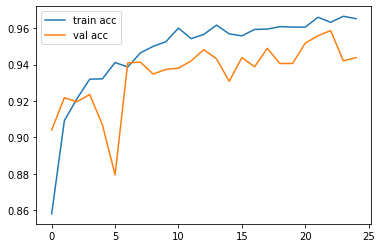

In [17]:
#Accuracy Plot
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()

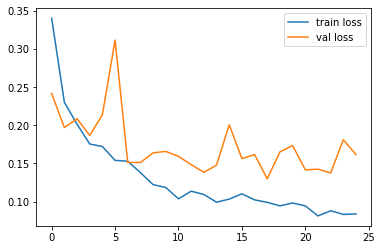

In [18]:
#Loss Plot
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [19]:
#Model Evaluation
model.evaluate(X_val,y_val,batch_size=32)

87/87 [==============================] - 5s 52ms/step - loss: 0.1615 - acc: 0.9439


[0.16153690218925476, 0.9438812732696533]

In [23]:
#predict
y_pred=model.predict(X_val)
y_pred=np.argmax(y_pred,axis=1)
actual_labels = np.argmax(y_val,axis=-1)

In [24]:
#get classification report
print(classification_report(y_pred,actual_labels))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2145
           1       0.82      0.95      0.88       617

    accuracy                           0.94      2762
   macro avg       0.90      0.95      0.92      2762
weighted avg       0.95      0.94      0.95      2762

